# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Moving Average Crossover Momentum Strategy

Momentum is the persistence of returns or trend in a particular direction. Identifying momentum in the price of an asset can help you take informed positions and make profits in the market.

After completing the notebook, you will be able to 
1. Read data from a CSV file
2. Calculate moving average of prices
3. Generate trading signals for moving average crossover strategy
4. Factor in trading commissions
5. Plot cumulative strategy returns and drawdowns


This notebook is divided into the following key parts.
1. [Read the data](#data_import)
2. [Calculate moving average](#moving_average)
3. [Plot the moving averages and the stock price](#data_plot)
4. [Generating the trade signals](#signal)
5. [Plot the positions taken](#position)
6. [Factoring in trading cost](#cost) 
5. [Evaluate the strategy](#evaluate)

## Import modules

In the code below we import modules to use functions and do calculations that are not built into python by default.

In [1]:
# Here you import the modules you will need in the code below
# This is numpy: it is python package for linear algebra
import numpy as np

# This is pandas: it is package for data manipulation and analysis
import pandas as pd

# This is matplotlib: it is library for plotting and visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

<a id='data_import'></a> 
## Read the data
In the code below, you will read Qualcomm data from the CSV file. You use pandas' ```read_csv()``` function to do this. In the ```read_csv()``` function you pass in the name of the file you're reading from. The syntax is shown below:

Syntax: 
```python
pd.read_csv(filename,index_col)
```
1. **filename**: name of the file in the string format
2. **index_col**: the column number to set as index

This data is available in the downloadable unit of this course in the last section. You can also download the price data from finance.yahoo.com.

In [2]:
# Path of the directory where the file is placed
path = '../data/'
data = pd.read_csv(path + 'QCOM_2015_2020.csv', index_col='Date')

# Convert date to date-time format
data.index = pd.to_datetime(data.index)

# Slicing out only the Adjusted close column
data = data[['Adj Close']]

<a id='moving_average'></a> 
## Calculate the moving averages

In the code below:
1. You first set the length of the short and long term moving windows. 
2. You will thereafter calculate the short term and long term moving averages. 

The rolling/moving averages are calculated by using the ```rolling()``` function. You will apply this function on the adjusted close series of the asset. The adjusted close is used as it is the stock split and merger adjusted last close price.

Internally, the ```rolling()``` function selects a window of prices and then applies a summary function to it. Here you have used the ```mean()``` function. The syntax is given below:


Syntax: 
```python
data['Adj Close'].rolling(window_size).mean()
```
1. **window_size**: size of the window for which we are finding the rolling mean

Here for moving windows of size window_size you are applying the function ```mean()``` for average to be calculated for each movement of the window.

In [3]:
# Short term window size
short_term_window_size = 40

# Long term window size
long_term_window_size = 70

# Store the short term moving average in a new column 'window_ST'
data.loc[:, 'window_ST'] = data['Adj Close'].rolling(
    short_term_window_size).mean()

# Store the long term moving average in a new column 'window_LT'
data.loc[:, 'window_LT'] = data['Adj Close'].rolling(
    long_term_window_size).mean()

<a id='data_plot'></a> 
## Plot the moving averages and the stock price

Using the plot function from the library matplotlib you will plot short term and long term moving average of Qualcomm. You will also plot the Qualcomm stock price. This is can be done together by using the ```plot()``` function as shown below.

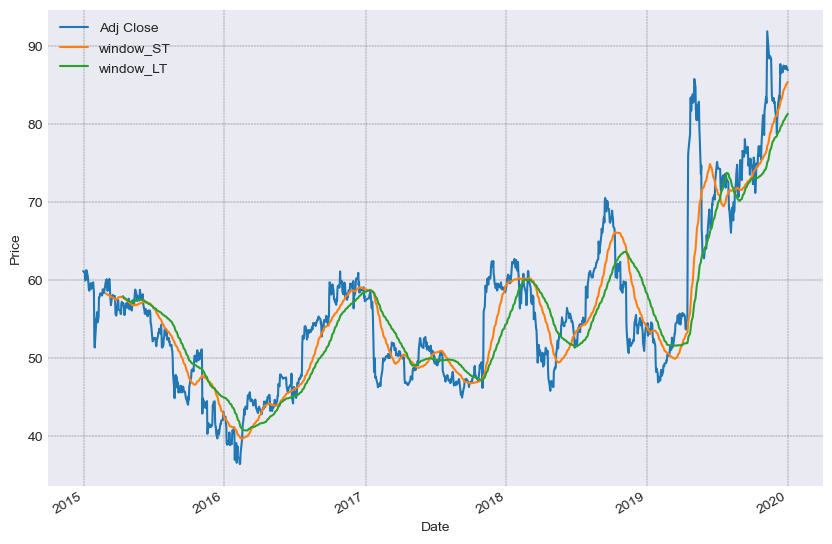

In [4]:
data.plot(figsize=(10, 7))
plt.ylabel('Price')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
plt.show()

<a id='signal'></a> 
## Generating the trade signals

In the code below, 
1. You compare the short term and long term moving average. These averages were calculated in the code above. 
2. If the short term moving average is greater than the long term moving average we set the signal as +1. +1 implies buy. -1 implies sell. 

You do this by using numpy's ```where()``` function. The ```where()``` function checks for whether a statement is true or false for each element in the given columns. It creates a new array and then assigns respective values. It works as follows:


Syntax: 
```python
   np.where(condition,value_if_true,value_if_false)
```
1. **condition**: boolean array representing an element wise condition
2. **value_if_true**: value to be assigned if condition is true
3. **value_if_false**: value to be assigned if condition is false


Thereafter, you shift the signal ahead by one day using the shift function. This is because the check was done on the data of a particular day and the signal is applied on the immediate next day.

In [5]:
# Compare the value of short term and long term window and set buy or sell signal at each point
# This is done using the numpy where function
data.loc[:, 'signal'] = np.where(data['window_ST'] > data['window_LT'], 1, -1)

# Apply the signal on the next day
data.loc[:, 'signal'] = data['signal'].shift(1)

# Replace NaN values with 0
data.loc[:, 'signal'] = data['signal'].replace(np.nan, 0)
data.tail(5)

/var/folders/h9/1hvgd39d6sn7_zygbvwl9_pw0000gn/T/ipykernel_14034/422909851.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan -1. -1. ...  1.  1.  1.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, 'signal'] = data['signal'].shift(1)


,Adj Close,window_ST,window_LT,signal
Date,,,,
2019-12-24,87.393005,84.674327,80.707758,1.0
2019-12-26,87.028748,84.855677,80.852836,1.0
2019-12-27,87.422539,85.052246,81.000608,1.0
2019-12-30,87.058281,85.264130,81.152528,1.0
2019-12-31,86.861382,85.394405,81.326616,1.0


<a id='position'></a> 
## Plot the positions taken
In the code below, you plot the signal you generate at each timestep.

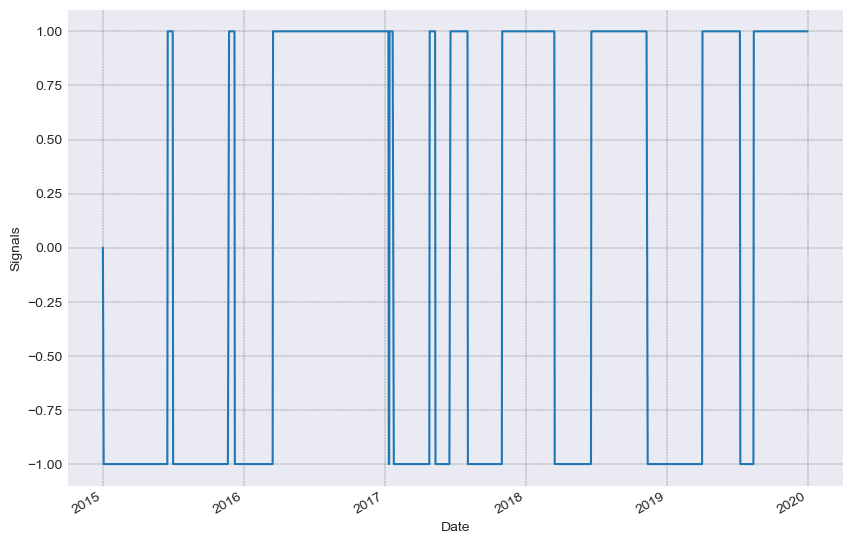

In [6]:
plt.figure(figsize=(10, 7))

# Plot drawdowns
data['signal'].plot()
plt.ylabel('Signals')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
plt.show()

Here we can see that right at the beginning of 2017, we sell our previously bought asset. Simultaneously, we sell a new asset. That is why in the graph we can see a line drawn from 1 to -1 right after the 2017 label. 

<a id='returns'></a> 
## Calculate returns

In the code below, you calculate the returns the strategy generates by taking a product of the daily percentage change with signals generated above. The function ```pct_change()``` can be applied to a given column in the dataframe. It tells you the change of price from a day before in terms of percentage. It is using the following formula:


$$daily\:change = \frac{(price_{today} - price_{yesterday})}{price_{yesterday}}$$

In [7]:
# Calculate the returns by multiplying the signal with daily price change
returns = data['signal']*data['Adj Close'].pct_change()

<a id='cost'></a> 
## Factoring in trading cost

In the code below, you factor in the trading commission into the daily returns. The commission is one-thousandth percent of the number of positions changed. For example, if you go from a buy position (+1) to a sell position (-1) the commission will be calculated as follows:

$$(0.001 * absolute(1-(-1))) = (0.001* absolute(2)) = (0.001 * 2) = 0.002$$

Like wise if the position is buy and continues to remain buy then in the commission is:

$$(0.001 * absolute(1-1)) = (0.001* absolute(0)) = (0.001 * 0) = 0$$

In [8]:
# Trading cost applied when position changed
cost = (0.001 * np.abs(data['signal'] - data['signal'].shift(-1)))

# Applying cost to returns
returns = returns - cost

<a id='evaluate'></a>
## Evaluating the strategy

In the code, below you evaluate the strategy using three popular metrics: 
1. Cumulative returns
2. Sharpe ratio
3. Maximum Drawdown 

Whether a strategy goes live for trading in financial markets is evaluated based on how well it does in the backtest. These measures along will some more check how well a strategy does on historical data.

## Cumulative returns

Cumulative returns is the aggregate change in returns over a period of time. 

In the code below: 
1. You calculate the cumulative returns. Cumulative returns are calculated using ```cumprod()``` which calculates the sequential product. For example, given below are a series and it's ```cumprod()```:

    series ---> [1,7,3,3,4]
    cumprod ---> [1,7,21,63,252]

2. You also plot the cumulative returns in case of simply buying the asset and holding it till the end of the data. This is called buying and holding. 

As we can see from the trajectory and also the final returns, moving average crossover strategy performed much better in comparison.

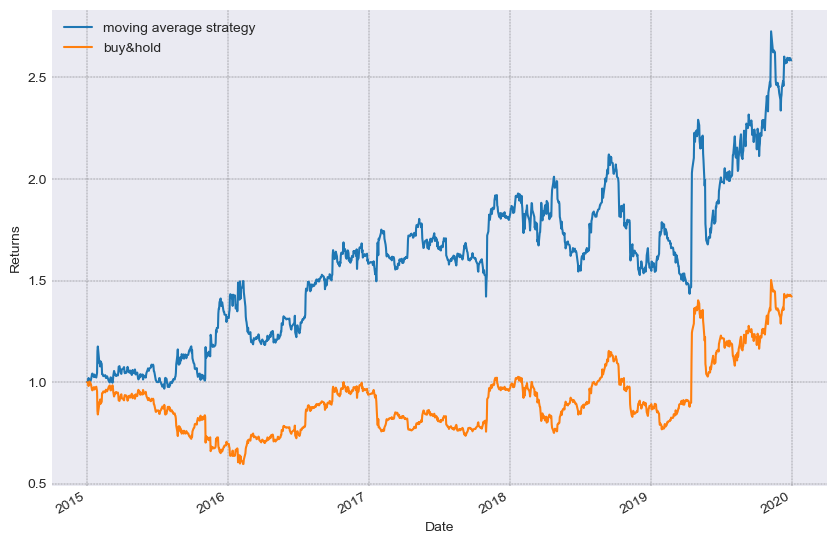

The cumulative returns: 2.584509872894181


In [9]:
plt.figure(figsize=(10, 7))
cumret = (returns+1).cumprod()
cumret.plot()  # Strategy

(data['Adj Close'].pct_change()+1).cumprod().plot()  # Buy and Hold

plt.legend(['moving average strategy', 'buy&hold'])
plt.ylabel('Returns')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
plt.show()

print('The cumulative returns: '+str((returns+1).prod()))

### Sharpe ratio

Sharpe ratio is the average returns per unit of risk. The risk is measured as the standard deviation. The standard deviation is a measure of risk as it measures how much on average the prices move or disperse. Thereby, telling you the uncertainty associated with it.

As shown in the code below, we measure the sharpe ratio by taking the average returns and dividing it by the standard deviation. We also multiply the square root of 252. This is because we want to annualise the sharpe ratio. Annualisation is standardising a value to one year time.

In [10]:
# sharpe
(returns.mean()/returns.std())*(252)**(1/2)

0.757215112556614

### Drawdown

A drawdown is the decline of the value of cumulative returns from it's last peak at each point in time. It is quoted as the percentage drop between the peak and the subsequent trough. 

In the code below, we calculate the drawdown as the percentage drop from the running max of the cumulative returns at each point.

The maximum drawdown is -32.36


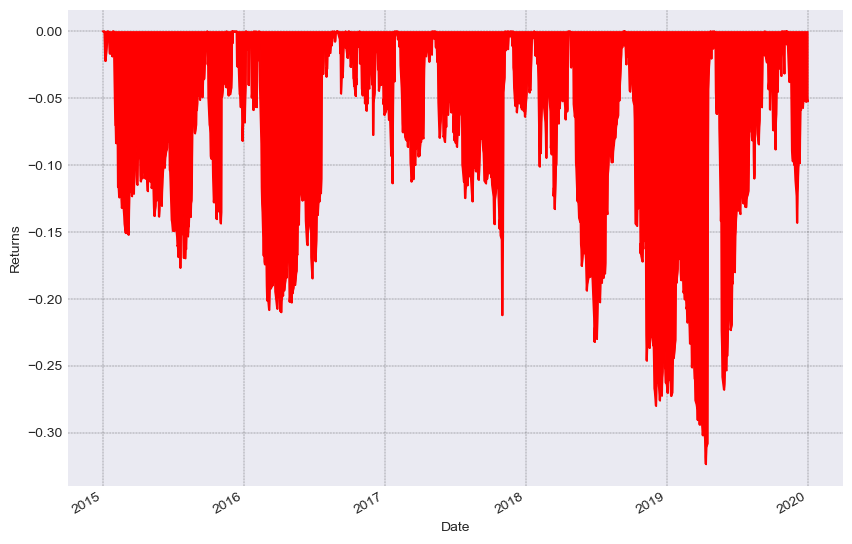

In [11]:
# Calculate the cumulative maximum value for the cumulative returns
running_max = np.maximum.accumulate(cumret.dropna())

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drop from the cumulative maximum and cumulative return at each point
drawdown = ((cumret)/running_max - 1)
max_dd = drawdown.min()*100
print('The maximum drawdown is %.2f' % max_dd)

# Set figure size
plt.figure(figsize=(10, 7))

# Plot drawdowns
drawdown.plot(color='r', figsize=(10, 7))
plt.ylabel('Returns')
plt.fill_between(drawdown.index, drawdown, color='red')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
plt.show()

## Conclusion

In this notebook, you saw how to design and implement a moving average crossover strategy. You also saw how to measure how well this strategy did. You visually compared it against the buy and hold strategy. In the coming sections, you will do a hands on of this strategy.